## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import os, sys
sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))

/Users/Tony/Other Docs/distilling-and-forgetting-in-large-pre-trained-models


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("outputs/ewc_fisher_params.csv")

df

,param_name,mean_fisher_importance
0,model.decoder.embed_positions.weight,332381.468750
1,model.decoder.embed_tokens.weight,7163.888184
2,model.decoder.layer_norm.bias,1065.960083
3,model.decoder.layer_norm.weight,22846.875000
4,model.decoder.layers.0.encoder_attn.k_proj.weight,36994.914062
...,...,...
162,model.encoder.layers.3.self_attn.q_proj.weight,529.144348
163,model.encoder.layers.3.self_attn.v_proj.bias,17841.486328
164,model.encoder.layers.3.self_attn.v_proj.weight,11260.207031
165,model.encoder.layers.3.self_attn_layer_norm.bias,4983.273926


In [5]:
df_param_name = df["param_name"].str.split(".", expand=True)
df = pd.concat([df, df_param_name], axis=1)

df.head()

,param_name,mean_fisher_importance,0,1,2,3,4,5,6
0,model.decoder.embed_positions.weight,332381.468750,model,decoder,embed_positions,weight,None,None,None
1,model.decoder.embed_tokens.weight,7163.888184,model,decoder,embed_tokens,weight,None,None,None
2,model.decoder.layer_norm.bias,1065.960083,model,decoder,layer_norm,bias,None,None,None
3,model.decoder.layer_norm.weight,22846.875000,model,decoder,layer_norm,weight,None,None,None
4,model.decoder.layers.0.encoder_attn.k_proj.weight,36994.914062,model,decoder,layers,0,encoder_attn,k_proj,weight


In [6]:
df[1].value_counts()

decoder    100
encoder     67
Name: 1, dtype: int64

In [7]:
df[2].value_counts()

layers             156
layer_norm           4
embed_positions      2
conv1                2
conv2                2
embed_tokens         1
Name: 2, dtype: int64

## Analysis

In [8]:
df.groupby(1)["mean_fisher_importance"].mean()

1
decoder    449120.222342
encoder     22960.213586
Name: mean_fisher_importance, dtype: float64

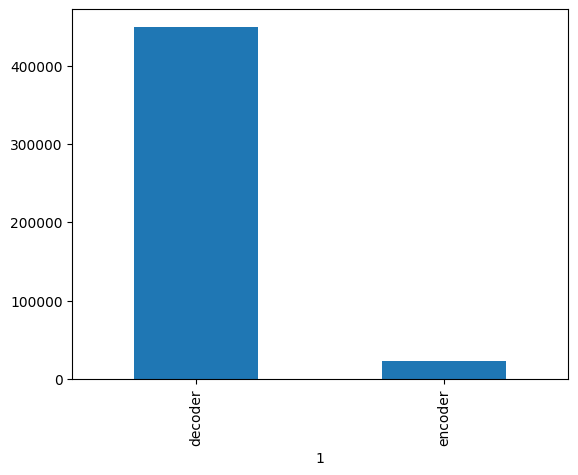

In [9]:
df.groupby(1)["mean_fisher_importance"].mean().plot.bar();

In [10]:
df[df[1]=="decoder"].groupby(3)["mean_fisher_importance"].mean()

3
0         1.321685e+06
1         3.698439e+05
2         1.339706e+05
3         3.069020e+04
bias      1.065960e+03
weight    1.207974e+05
Name: mean_fisher_importance, dtype: float64

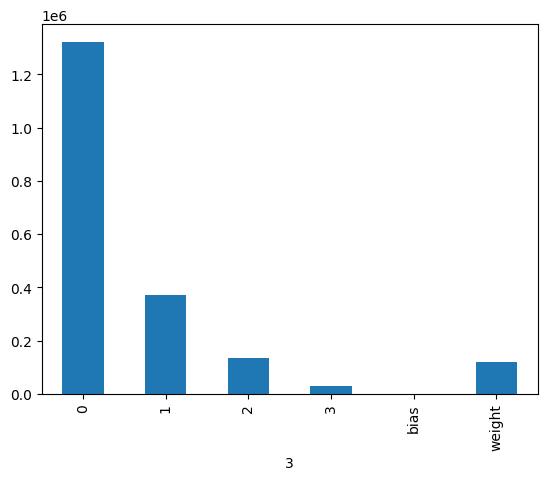

In [11]:
df[df[1]=="decoder"].groupby(3)["mean_fisher_importance"].mean().plot.bar();